<a href="https://colab.research.google.com/github/WhiteWolf088/Projects/blob/main/Sentimental_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Description

* Performing Sentimental Analysis Using Restaurant Reviews data set


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_table('https://raw.githubusercontent.com/WhiteWolf088/Data_Sets/main/Restaurant_Reviews.csv')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [4]:
df.shape

(1000, 2)

In [5]:
df.size

2000

In [6]:
df.isna().sum()

Review    0
Liked     0
dtype: int64

In [7]:
df.notna().sum()

Review    1000
Liked     1000
dtype: int64

* There is no null values So we don't have to drop the values

In [8]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [10]:
len(df)

1000

## Visualizing our DataSet

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


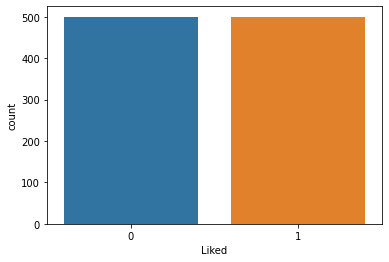

In [11]:
sns.countplot(df['Liked'])

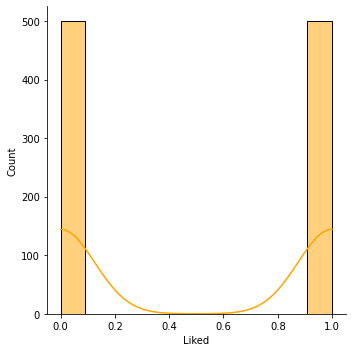

In [12]:
sns.displot(x=df['Liked'],color='orange',kde=True)

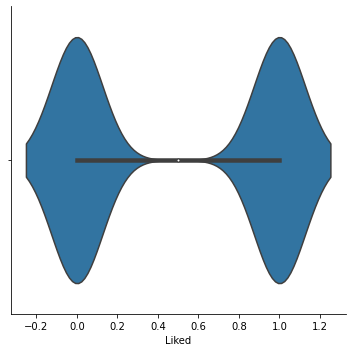

In [13]:
sns.catplot(x='Liked',data=df,split=True,kind='violin')

## Stemming and Lemmatization

In [14]:
import nltk 
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

### Stemming

In [15]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [16]:
stemmer=PorterStemmer()

In [17]:
list=[]
for i in range(len(df)):
  review=re.sub('[^a-zA-Z]',' ',str(df['Review'][i]))
  review=review.lower()
  review=review.split()

  review_stem=[stemmer.stem(word) for word in review if not word in stopwords.words('english')]
  review_stem=' '.join(review_stem)
  list.append(review_stem)

In [18]:
list[:5]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price']

### Lemmatization

In [19]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [20]:
list2=[]
for i in range(len(df)):
  review=re.sub('[^a-zA-Z]',' ',str(df['Review'][i]))
  review=review.lower()
  review=review.split()

  review_stem=[lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
  review_stem=' '.join(review_stem)
  list2.append(review_stem)

In [21]:
list2[:5]

['wow loved place',
 'crust good',
 'tasty texture nasty',
 'stopped late may bank holiday rick steve recommendation loved',
 'selection menu great price']

## Vectorization

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
x=vectorizer.fit_transform(list).toarray()
y=df.iloc[:,-1].values

In [23]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

## Importing the Model

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [26]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [27]:
y_preds=classifier.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix

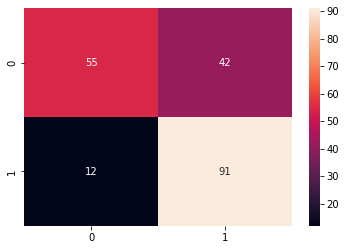

In [29]:
cm=confusion_matrix(y_test,y_preds)
sns.heatmap(cm,annot=True)
plt.show()

In [30]:
accuracy_score(y_test,y_preds)

0.73

In [31]:
x_pred=np.array(['The Service is Good'])
x_pred=vectorizer.transform(x_pred).toarray()
prediction=classifier.predict(x_pred)
if prediction==1:
  print('Positive Review')
else:
  print('Negative Review')

Positive Review


In [32]:
x_pred=np.array(['Food is very bad'])
x_pred=vectorizer.transform(x_pred).toarray()
prediction=classifier.predict(x_pred)
if prediction==1:
  print('Positive Review')
else:
  print('Negative Review')

Negative Review


## `Another Way to create a Model -->`

In [33]:
import tensorflow as tf
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(1,activation='sigmoid')
])
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_2.fit(x_train,y_train,epochs=10)

Epoch 1/10
25/25 [==============================] - 4s 4ms/step - loss: 0.6869 - accuracy: 0.5587
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: 0.5737 - accuracy: 0.8737
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 0.2391 - accuracy: 0.9287
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0690 - accuracy: 0.9762
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9887
Epoch 6/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0229 - accuracy: 0.9912
Epoch 7/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0191 - accuracy: 0.9937
Epoch 8/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9912
Epoch 9/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9937
Epoch 10/10
25/25 [==============================] - 0s 3ms/step - loss: 0.0137 - accuracy: 0.9950


In [34]:
model_2.evaluate(x_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.8809 - accuracy: 0.7650


[0.8809397220611572, 0.7649999856948853]

In [35]:
x_pred=np.array(['Food is good'])
x_pred=vectorizer.transform(x_pred).toarray()
prediction=model_2.predict(x_pred)
A=tf.round(prediction)
if A==1:
  print('Positive Review')
else:
  print('Negative Review')

Positive Review


In [36]:
x_pred=np.array(['Service is bad'])
x_pred=vectorizer.transform(x_pred).toarray()
prediction=model_2.predict(x_pred)
A=tf.round(prediction)
if A==1:
  print('Positive Review')
else:
  print('Negative Review')

Negative Review


👩🏼‍💻 Project Completed by **P PAVAN KUMAR REDDY**